In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Copy of movie.csv")
print("Shape of the dataset:", df.shape)
print("Sample data:")


Shape of the dataset: (40000, 2)
Sample data:


In [ ]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
positive_reviews = df[df['label'] == 1]['text']
negative_reviews = df[df['label'] == 0]['text']

In [ ]:
print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))

Number of positive reviews: 19981
Number of negative reviews: 20019


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [ ]:
# Step 6: Building the RNN Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=max_len),
    LSTM(units=32),
    Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train_padded,
    y_train, epochs=50,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/50
200/200 [==============================] - 13s 66ms/step - loss: 0.4771 - accuracy: 0.7695 - val_loss: 0.3871 - val_accuracy: 0.8288
Epoch 2/50
200/200 [==============================] - 6s 31ms/step - loss: 0.3131 - accuracy: 0.8737 - val_loss: 0.3814 - val_accuracy: 0.8314
Epoch 3/50
200/200 [==============================] - 5s 27ms/step - loss: 0.2583 - accuracy: 0.9006 - val_loss: 0.4105 - val_accuracy: 0.8234
Epoch 4/50
200/200 [==============================] - 4s 18ms/step - loss: 0.2178 - accuracy: 0.9199 - val_loss: 0.4573 - val_accuracy: 0.8173
Epoch 5/50
200/200 [==============================] - 3s 13ms/step - loss: 0.1870 - accuracy: 0.9326 - val_loss: 0.5378 - val_accuracy: 0.8105
Epoch 6/50
200/200 [==============================] - 2s 12ms/step - loss: 0.1539 - accuracy: 0.9468 - val_loss: 0.5173 - val_accuracy: 0.8102
Epoch 7/50
200/200 [==============================] - 2s 12ms/step - loss: 0.1333 - accuracy: 0.9540 - val_loss: 0.5684 - val_accuracy: 0.810

In [ ]:
import matplotlib.pyplot as plt


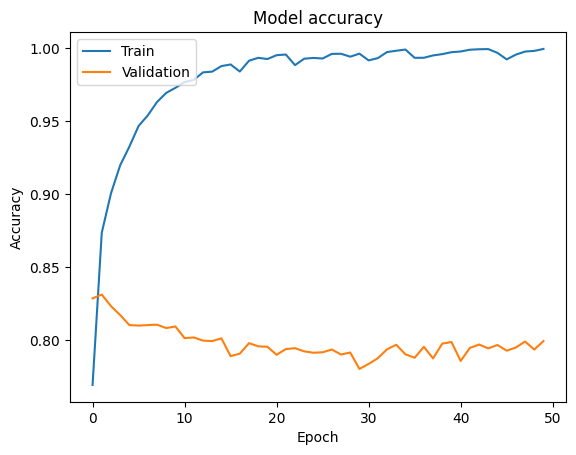

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

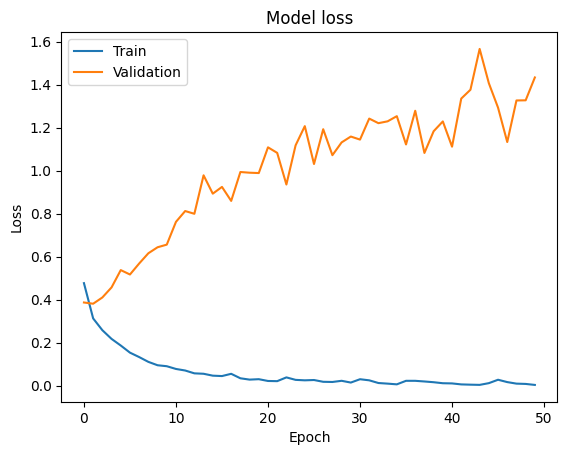

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Step 8: Evaluating the Model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)

250/250 [==============================] - 2s 4ms/step - loss: 1.3897 - accuracy: 0.7985
Test Accuracy: 0.7985000014305115


In [ ]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = model.predict(padded_sequence)[0][0]
    if prediction >= 0.5:
        return "Positive"
    else:
        return "Negative"

In [ ]:
# Example usage
text = "I loved the movie! It was fantastic."
sentiment = predict_sentiment(text)
print("Sentiment:", sentiment)

1/1 [==============================] - 1s 1s/step
Sentiment: Positive
